## 相関と因果
**相関関係**とは、変数Zの値が大きいときに、対応する変数yも値が大きい傾向にある  
**因果関係**とは、変数Zの値が大きくなるときに、対応する変数yの値も大きくなる傾向にある  
直接因果関係のない2つの変数に相関関係が見られることを**疑似相関**と呼ぶ。  
疑似相関には以下の3つのパターンがある。  
1. 因果の関係が逆
2. 共通する別の変数から影響を受けている  
　このとき、共通変数のことを**交絡因子**と呼ぶ。
3. 合流点での選別  
　2つの変数の合計で選抜した場合などに起こる

In [6]:
import numpy as np
from scipy import stats
from numpy.random import randn
import matplotlib.pyplot as plt

#### ZからYへ因果が存在する場合

In [2]:
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

Z = e_z
Y = 2*Z + e_y

In [5]:
np.corrcoef(Z, Y)

array([[1.        , 0.91288853],
       [0.91288853, 1.        ]])

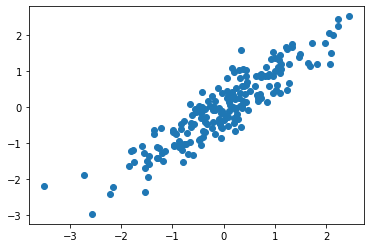

In [7]:
# 標準化
Z_std = stats.zscore(Z)
Y_std = stats.zscore(Y)

plt.scatter(Z_std, Y_std)

#### 1. 因果の関係が逆

In [8]:
num_data = 200
e_z = randn(num_data)
e_y = randn(num_data)

Y = e_y
Z = 2*Y + e_z

np.corrcoef(Z, Y)

array([[1.        , 0.91490545],
       [0.91490545, 1.        ]])

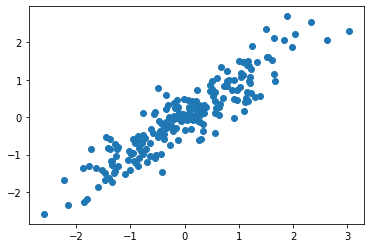

In [9]:
# 標準化
Z_std = stats.zscore(Z)
Y_std = stats.zscore(Y)

plt.scatter(Z_std, Y_std)

#### 2. 共通原因（交絡）

In [12]:
num_data = 200
e_x = randn(num_data)
e_z = randn(num_data)
e_y = randn(num_data)

Y = 3.3*e_x + e_z
Z = 3.3*e_x + e_y

np.corrcoef(Z, Y)

array([[1.        , 0.92298759],
       [0.92298759, 1.        ]])

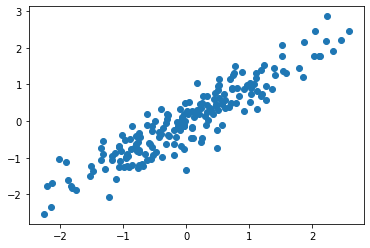

In [13]:
# 標準化
Z_std = stats.zscore(Z)
Y_std = stats.zscore(Y)

plt.scatter(Z_std, Y_std)

#### 3. 合流点での選抜

[[ 1.         -0.02930556]
 [-0.02930556  1.        ]]


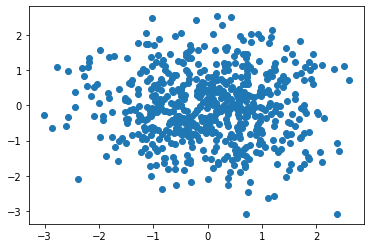

In [15]:
num_data = 600
e_x = randn(num_data)
e_y = randn(num_data)

x = e_x
y = e_y

print(np.corrcoef(x, y))

plt.scatter(x, y)

[[ 1.         -0.44719923]
 [-0.44719923  1.        ]]


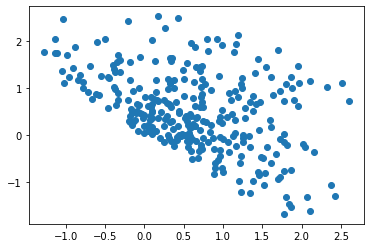

In [17]:
z = x + y

x_new = np.array([])
y_new = np.array([])

for i in range(num_data):
    if z[i] > 0.0:
        x_new = np.append(x_new, x[i])
        y_new = np.append(y_new, y[i])

print(np.corrcoef(x_new, y_new))
plt.scatter(x_new, y_new)